Plot the populations for the years in the period. Add legend and axis labels to the plot.

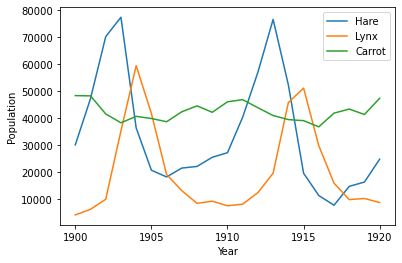

In [11]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:, 0]
plt.plot(years, data[:, 1], label='Hare')
plt.plot(years, data[:, 2], label='Lynx')
plt.plot(years, data[:, 3], label='Carrot')
plt.legend()
plt.xticks(years.astype(int)[::5])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

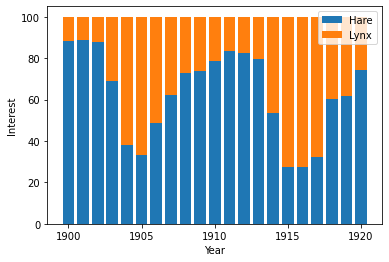

In [12]:
total = (data[:,1]+data[:,2])/100
plt.bar(years, data[:, 1]/total, label='Hare')
plt.bar(years, data[:, 2]/total, label='Lynx',bottom=data[:,1]/total)
plt.legend()
plt.xticks(years.astype(int)[::5])
plt.xlabel('Year')
plt.ylabel('Interest')
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

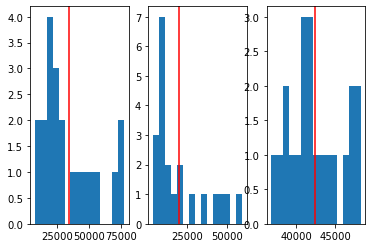

In [13]:
fig, ax = plt.subplots(1,3)
ax[0].hist(data[:,1], bins=15)
ax[0].axvline(data[:,1].mean(), c='r')

ax[1].hist(data[:,2], bins=15)
ax[1].axvline(data[:,2].mean(), c='r')

ax[2].hist(data[:,3], bins=15)
ax[2].axvline(data[:,3].mean(), c='r')
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

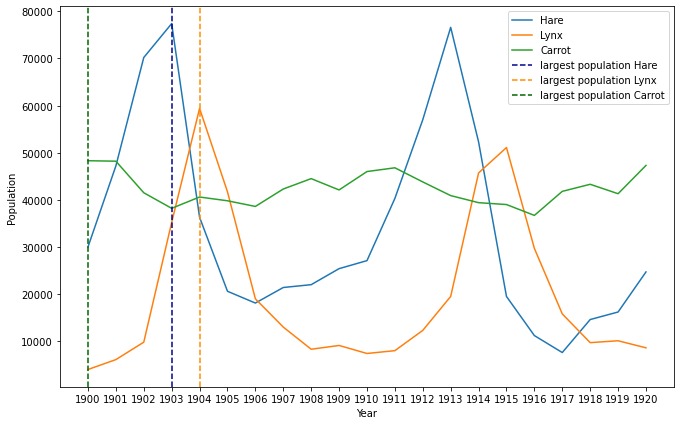

In [14]:
plt.figure(figsize=(11,7))
years = data[:, 0]
plt.plot(years, data[:, 1], label='Hare')
plt.plot(years, data[:, 2], label='Lynx')
plt.plot(years, data[:, 3], label='Carrot')
plt.axvline(data[data[:,1].argmax(),0], c='darkblue',linestyle='--', label='largest population Hare')
plt.axvline(data[data[:,2].argmax(),0], c='darkorange',linestyle='--', label='largest population Lynx')
plt.axvline(data[data[:,3].argmax(),0], c='darkgreen',linestyle='--', label='largest population Carrot')
plt.legend()
plt.xticks(years.astype(int))
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


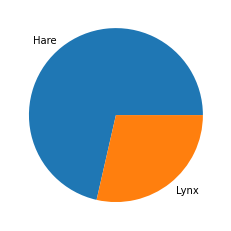

In [15]:
m=data[:,1:3].argmax(axis=1)
s=np.full(m.shape,'H',dtype=str)
s[m==1]='L'
print(s)
plt.pie([1-m.sum()/m.shape[0],m.sum()/m.shape[0]],labels=['Hare','Lynx'])
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

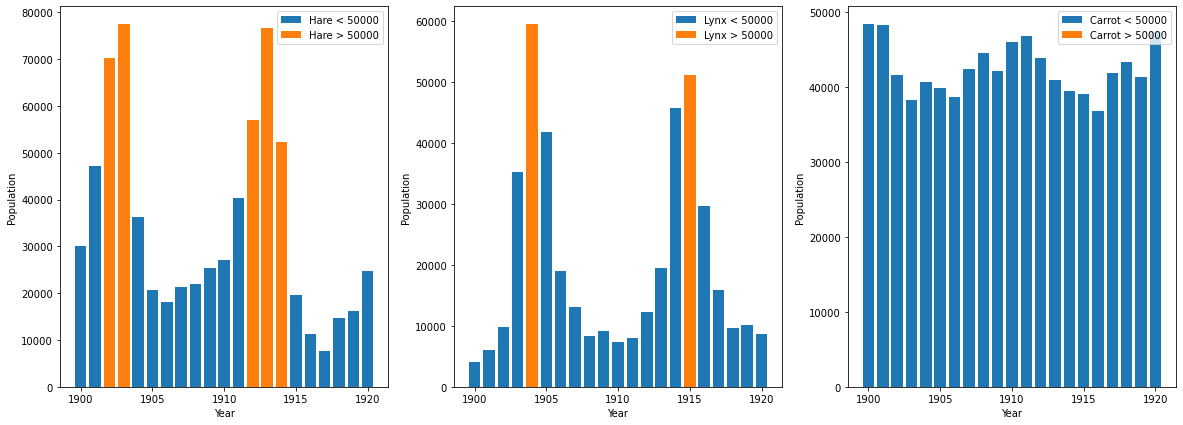

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
ax[0].bar(years, data[:, 1], label='Hare < 50000')
ax[1].bar(years, data[:, 2], label='Lynx < 50000')
ax[2].bar(years, data[:, 3], label='Carrot < 50000')
h=np.array(data[:, 1])
h[data[:, 1]<50000]=0
l=np.array(data[:, 2])
l[data[:, 2]<50000]=0
c=np.array(data[:, 3])
c[data[:, 3]<50000]=0
ax[0].bar(years, h, label='Hare > 50000')
ax[1].bar(years, l, label='Lynx > 50000')
plt.legend()
ax[2].bar(years, c, label='Carrot > 50000')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Population')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Population')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Population')
plt.show()

Find the top 2 years for each species when they had the lowest populations.

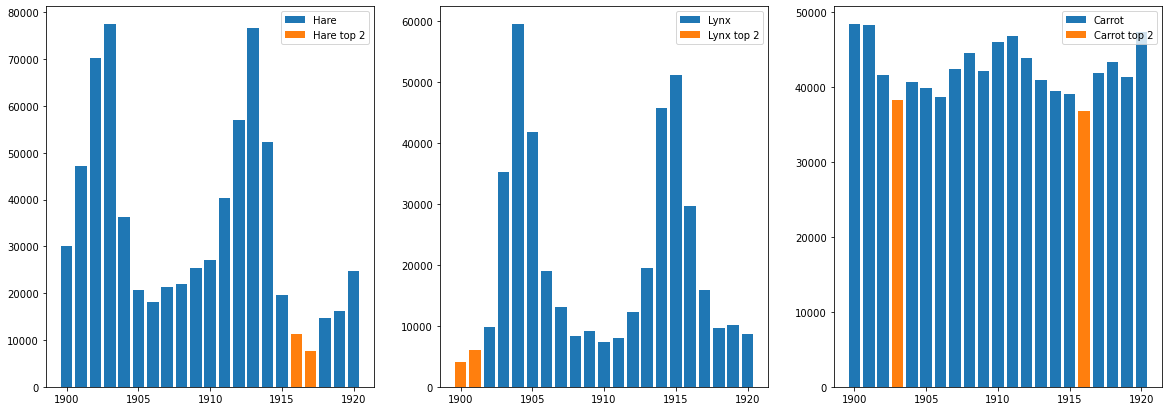

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
ax[0].bar(years, data[:, 1], label='Hare')
ax[1].bar(years, data[:, 2], label='Lynx')
ax[2].bar(years, data[:, 3], label='Carrot')
h=np.array(data[:, 1])
hi=np.argsort(data[:,1])
h[(h!=h[hi[0]])&(h!=h[hi[1]])]=0
l=np.array(data[:, 2])
li=np.argsort(data[:,2])
l[(l!=l[li[0]])&(l!=l[li[1]])]=0
c=np.array(data[:, 3])
ci=np.argsort(data[:,3])
c[(c!=c[ci[0]])&(c!=c[ci[1]])]=0
ax[0].bar(years, h, label='Hare top 2')
ax[1].bar(years, l, label='Lynx top 2')
ax[2].bar(years, c, label='Carrot top 2')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

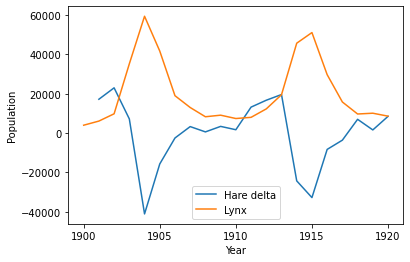

array([[ 1.        , -0.84948016],
       [-0.84948016,  1.        ]])

In [18]:
years = data[:, 0]
plt.plot(years[1:], np.diff(data[:, 1]), label='Hare delta')
plt.plot(years, data[:, 2], label='Lynx')
plt.legend()
plt.xticks(years.astype(int)[::5])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()
np.corrcoef(np.diff(data[:,1]), data[1:,2])


Show population of hares vs carrots and hares vs lynxes.

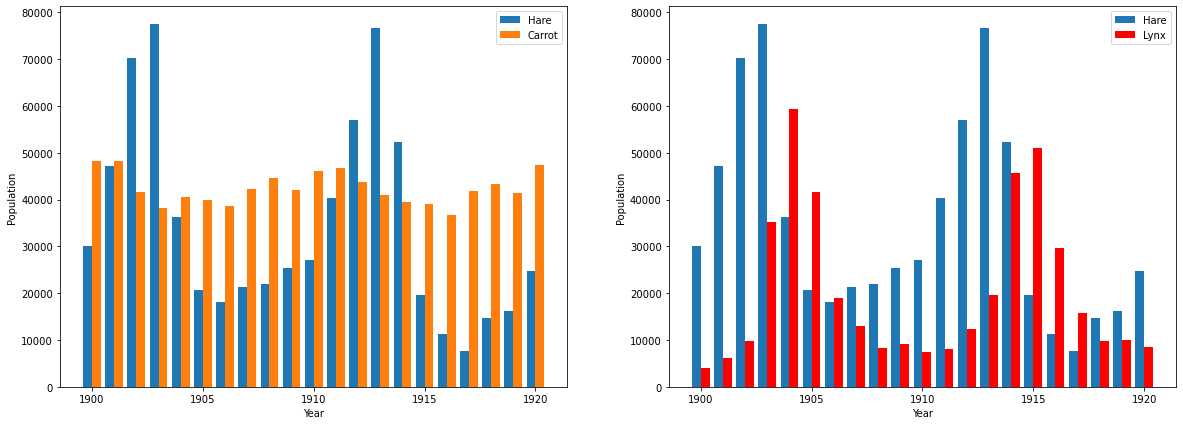

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].bar(years-0.2, data[:, 1], label='Hare', width = 0.4)
ax[1].bar(years-0.2, data[:, 1], label='Hare', width = 0.4)
ax[1].bar(years+0.2, data[:, 2], label='Lynx',color = 'red', width = 0.4)
ax[0].bar(years+0.2, data[:, 3], label='Carrot', width = 0.4)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Population')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Population')
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [20]:
#Из за высокого значения модуля коэффициента корреляции между приращением популяции зайцев и популяцией рысей, который мы 
#вычисляли в одном из предыдущих заданий и исходя из графика того же задания предположу их линейную зависимость(пусть их 
#среднее арифметическое константе),тогда в этом предположение посчитаем их среднее арифметичиское в среднем по годам до 1919:
con=((data[1:-1,1]-data[:-2,1]+data[1:-1,2])/2).mean()
#предполагаем что con - постоянна, тогда приращение в последний год оценивается так:
PH19_20=2*con-data[-1,2]
PH20=data[-2,1]+PH19_20
abs(data[-1,1]-PH20)/data[-1,1]

0.15384615384615385

Plot a graph of total explained variance vs number of principal components.

In [21]:
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
print(digits.data.shape)

(70000, 784)


In [25]:
from sklearn.decomposition import PCA

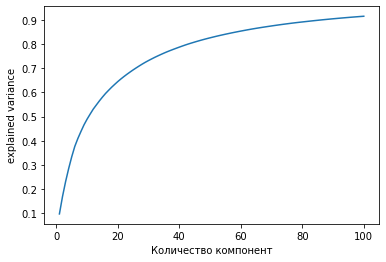

In [29]:
pca = PCA(n_components=100)

pca.fit_transform(digits.data.astype(float))
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(100)+1,var)
plt.xlabel('Количество компонент')
plt.ylabel('explained variance')
plt.show()

Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [32]:
pca = PCA(n_components=784)
pca.fit_transform(digits.data.astype(float))
var = np.cumsum(pca.explained_variance_ratio_)

In [40]:
k=np.zeros(4,dtype=int)
for i in range(var.size) :
    if var[i]> 0.85 :
        k[0]=i+1
        break
for i in range(var.size) :
    if var[i]> 0.90 :
        k[1]=i+1 
        break
for i in range(var.size) :
    if var[i]> 0.95 :
        k[2]=i+1
        break
for i in range(var.size) :
    if var[i]> 0.99 :
        k[3]=i+1
        break
print(' для 80% нужно:',k[0],'\n','для 85% нужно:',k[1],'\n','для 95% нужно:',k[2],'\n','для 99% нужно:',k[3])

 для 80% нужно: 59 
 для 85% нужно: 87 
 для 95% нужно: 154 
 для 99% нужно: 331


Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

In [41]:
X_restored=np.zeros([5,70000,784],dtype=np.int8)
X_restored[4]=digits.data.astype(float)
for j in range(4) :
    pca = PCA(n_components=k[j])
    X_transformed=pca.fit_transform(digits.data.astype(float))
    X_restored[j] = pca.inverse_transform(X_transformed)

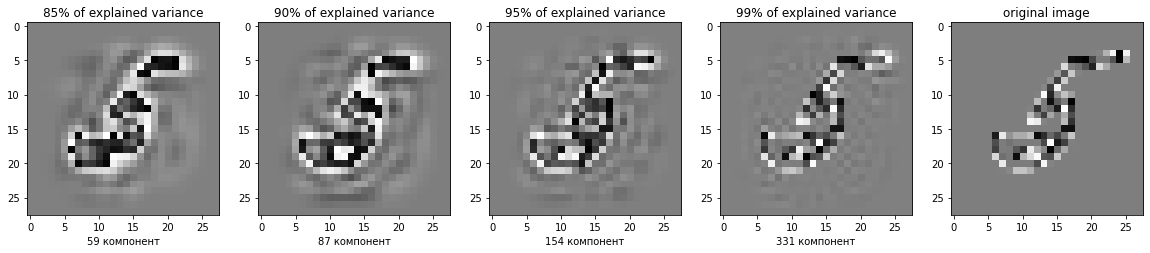

In [53]:
i=1111
fig, ax = plt.subplots(1, 5)
for j in range(5) :
    ax[j].imshow(X_restored[j,i].reshape(28, 28), cmap='gray')
ax[0].set_title('85% of explained variance')
ax[1].set_title('90% of explained variance')
ax[2].set_title('95% of explained variance')
ax[3].set_title('99% of explained variance')
ax[4].set_title('original image')
ax[0].set_xlabel('59 компонент')
ax[1].set_xlabel('87 компонент')
ax[2].set_xlabel('154 компонент')
ax[3].set_xlabel('331 компонент')
fig.set_figwidth(20)   
fig.set_figheight(20) 
plt.show()